In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

FOLDER_INTERIM = os.environ.get("DIR_DATA_INTERIM")
DATA_CRIME_CATEGORY = "df_category.csv"

In [3]:
df_crime = pd.read_csv(filepath_or_buffer=FOLDER_INTERIM + "/" + DATA_CRIME_CATEGORY, 
                       parse_dates=['Outcome Date'])

## Crime over time - all of Camden

In [ ]:
# population looks strange, shouldn't change month-by-month
df_crime.groupby(by=['Outcome Date']).agg(func={"Crime Incidences": 'sum', "Population": 'sum'}).reset_index()

In [22]:
df_camden = df_crime.groupby(by=['Outcome Date']).agg(func={"Crime Incidences": 'sum', "Population": 'sum'}).reset_index()
df_camden['Crime Rate'] = df_camden['Crime Incidences'] / df_camden['Population']
df_camden['Crime Rate Log'] = np.log10(df_camden['Crime Rate'])

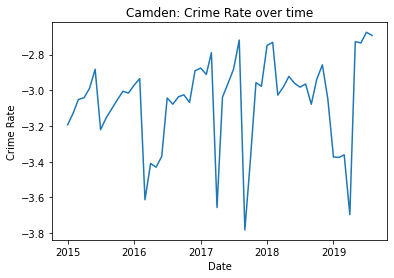

In [23]:
plt.plot('Outcome Date', 'Crime Rate Log', data=df_camden)
plt.title("Camden: Crime Rate over time")
plt.xlabel("Date")
plt.ylabel("Crime Rate")
plt.show()